In [5]:
# -------------------------------------------------------
# Netflix Dataset Analysis
# Content Trends Analysis for Strategic Recommendations
# -------------------------------------------------------

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Setup visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)



In [6]:
# -------------------------------------------------------
# 2. Load Dataset
# -------------------------------------------------------
df = pd.read_csv("Netflix Dataset.csv") # Assuming the file is named this way

# Quick look at dataset
print("Shape of Dataset:", df.shape)
print("\nColumns:", df.columns.tolist())


Shape of Dataset: (7789, 11)

Columns: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']


In [7]:
# -------------------------------------------------------
# 3. Data Cleaning
# -------------------------------------------------------

# Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract Year
df['Year'] = df['Release_Date'].dt.year

# Handle missing values
df['Director'] = df['Director'].fillna("Unknown")
df['Cast'] = df['Cast'].fillna("Unknown")
df['Country'] = df['Country'].fillna("Unknown")
df['Rating'] = df['Rating'].fillna("Not Rated")
df.dropna(subset=['Year'], inplace=True) # Drop rows where year couldn't be extracted
df['Year'] = df['Year'].astype(int)



--- Analyzing Movies vs. TV Shows Trend ---


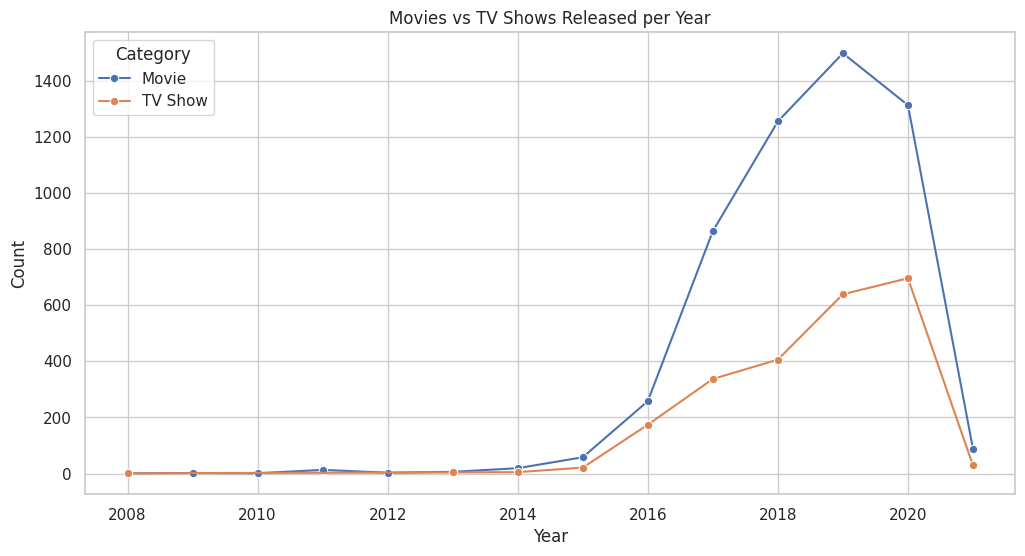


--- Analyzing Top 10 Genres ---


/tmp/ipython-input-1054572808.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




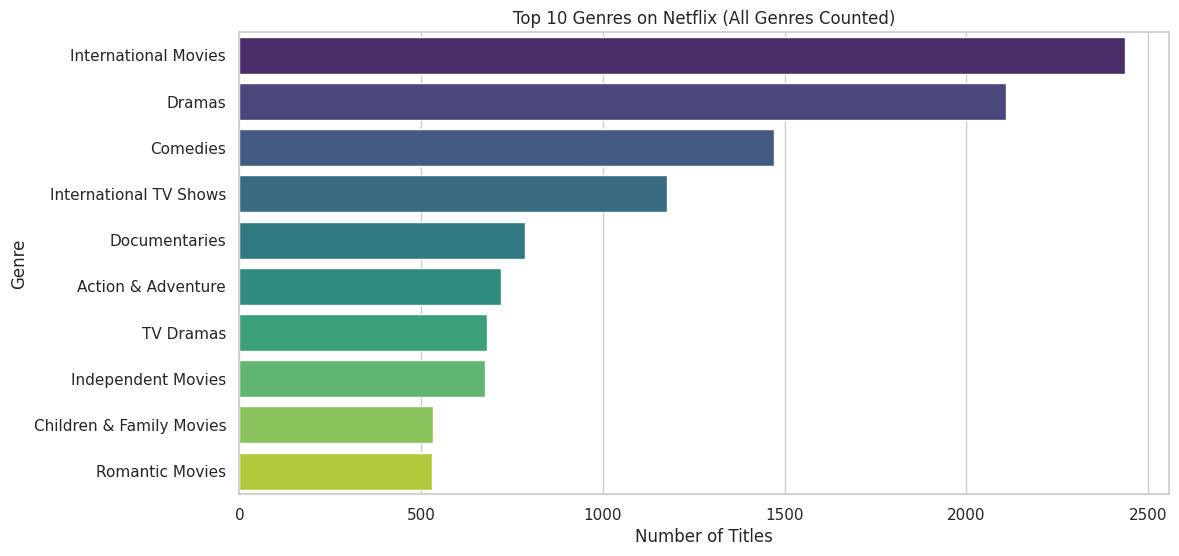

In [8]:
# -------------------------------------------------------
# 4. Analysis & Visualizations
# -------------------------------------------------------

# 1. Line Chart – Movies vs. TV Shows released per year
print("\n--- Analyzing Movies vs. TV Shows Trend ---")
content_trend = df.groupby(['Year', 'Category']).size().reset_index(name='Count')
plt.figure(figsize=(12, 6))
sns.lineplot(data=content_trend, x='Year', y='Count', hue='Category', marker='o')
plt.title("Movies vs TV Shows Released per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# 2. Bar Chart – Top 10 Genres (UPGRADED)
print("\n--- Analyzing Top 10 Genres ---")
# UPGRADE: Instead of just the main genre, we split all genres
all_genres = df['Type'].str.split(', ').explode()
top_genres = all_genres.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title("Top 10 Genres on Netflix (All Genres Counted)")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()





--- Analyzing Content by Country ---



--- Visualizing Top 10 Countries ---


/tmp/ipython-input-2033732428.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




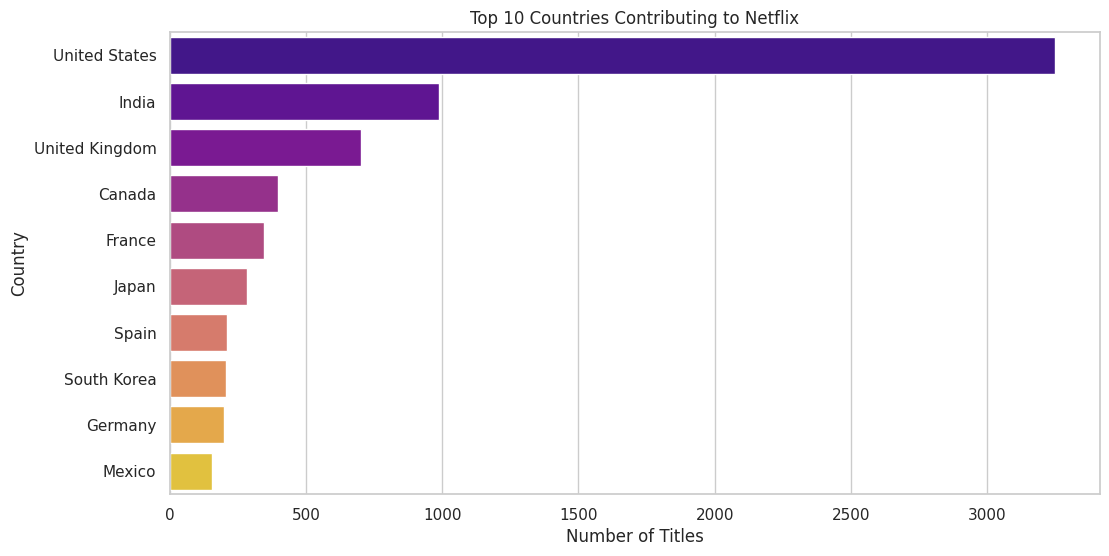

In [9]:
# 3. Choropleth Map – Country-wise Content (UPGRADED)
print("\n--- Analyzing Content by Country ---")
# UPGRADE: Instead of combined countries, we split them to count individual contributions
country_counts = df['Country'].str.split(', ').explode().value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Remove the "Unknown" category for a cleaner map
country_counts = country_counts[country_counts['Country'] != 'Unknown']

fig = px.choropleth(country_counts,
                    locations="Country",
                    locationmode="country names",
                    color="Count",
                    hover_name="Country",
                    color_continuous_scale="viridis",
                    title="Netflix Content by Country (All Countries Counted)")
fig.show()


# 4. Horizontal Bar Chart for Top 10 Countries (New addition for clarity)
print("\n--- Visualizing Top 10 Countries ---")
top_countries = country_counts.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Country', data=top_countries, palette='plasma')
plt.title("Top 10 Countries Contributing to Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()